In [1]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib, os, math

os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

### 1.Prepare data

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/final_22/224/5k/X_train.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 844.0371563434601 seconds


In [3]:
len(X_train)

88000

In [23]:
# from time import time
# import numpy as np

# start_time = time()

# print('Loading X_validate...')
# X_validate = np.load('/home/zxt/data/final_22/224/5k/X_validate.npy')

# print('Loading X_test...')
# X_test = np.load('/home/zxt/data/final_22/224/5k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/final_22/224/5k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/final_22/224/5k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/final_22/224/5k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading labels...
Running time: 77.31244158744812 seconds


In [5]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (88000, 224, 224, 3)
88000 train samples
11000 validate samples
11000 test samples


In [35]:
Y_train.shape

(88000, 1)

In [25]:
Y_validate.shape

(11000, 1)

In [26]:
Y_test.shape

(11000, 1)

In [9]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [10]:
Y_train = np.load('/home/zxt/data/final_22/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/final_22/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/final_22/224/2k/Y_test.npy')

In [11]:
Y_test

array([['guineafowl'],
       ['lion'],
       ['wildebeest'],
       ...,
       ['buffalo'],
       ['hare'],
       ['black_bear']], dtype='<U16')

In [36]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

In [37]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,22)
y_valid=np_utils.to_categorical(Y_validate,22)
y_test=np_utils.to_categorical(Y_test,22)

In [38]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 2.Model structure

In [27]:
def alexnet_s(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    
    # S: add two more layers to train
    x = Dropout(0.4)(x)
    x = Dense(4096,activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(4096,activation='relu')(x)
    
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [28]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

### 3.Data Augmentation

In [29]:
# # Data augmentation

# image_datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.3,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     brightness_range=(0.6,1),
#     fill_mode="nearest")

# image_datagen.fit(X_train, augment=True)

### 3.Modeling

In [30]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 40
n_classes = 22
input_shape = 224,224,3

learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [31]:
K.clear_session()
model = alexnet_s(input_shape, n_classes)
# model.summary()

In [32]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [47]:
start_time = time()
print('Training model...')


hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=20,
#     callbacks=[early_stopping],
    validation_data = (X_validate,y_valid))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Training model...
Train on 88000 samples, validate on 11000 samples
Epoch 1/20
88000/88000 [==============================] - 418s 5ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.5561 - val_accuracy: 0.8951
Epoch 2/20
88000/88000 [==============================] - 420s 5ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.5511 - val_accuracy: 0.8971
Epoch 3/20
88000/88000 [==============================] - 418s 5ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.5570 - val_accuracy: 0.8992
Epoch 4/20
88000/88000 [==============================] - 422s 5ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.5839 - val_accuracy: 0.8995
Epoch 5/20
88000/88000 [==============================] - 424s 5ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.5695 - val_accuracy: 0.8987
Epoch 6/20
88000/88000 [==============================] - 425s 5ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.5762 - val_accuracy: 0.9015
Epoch 7/20
88000/88000 [====================

In [50]:
model.save('/home/zxt/data/final_22/model/224_5k/alexnet_s_40epoch.h5')
model.save_weights('/home/zxt/data/final_22/model/224_5k/alexnet_s_40epoch_weights.h5')

### 4.Evaluation

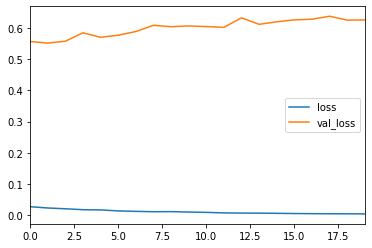

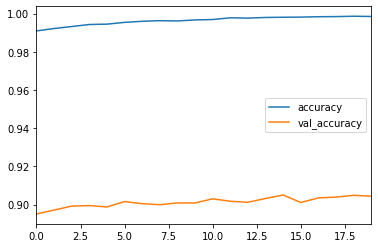

In [51]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [52]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

11000/11000 [==============================] - 31s 3ms/step

test loss 0.6736846257399091
accuracy 0.9051818251609802


In [53]:
y_pred = model.predict(X_test,batch_size=1)

In [54]:
y_pred

array([[2.7718507e-16, 5.2957839e-13, 3.3255152e-17, ..., 3.5044995e-10,
        2.2263925e-11, 1.5677665e-14],
       [2.7416841e-21, 1.7030385e-14, 3.3268269e-22, ..., 5.2233032e-14,
        6.3315058e-17, 5.4075026e-20],
       [2.5677487e-02, 4.4983020e-14, 1.9969532e-08, ..., 1.2326187e-13,
        1.1822144e-09, 9.6323538e-07],
       ...,
       [6.7046977e-04, 3.2791729e-09, 2.9727976e-06, ..., 7.7331226e-09,
        2.9572652e-08, 3.9145979e-03],
       [7.4325540e-10, 1.2986153e-16, 1.6125136e-16, ..., 1.6115746e-21,
        1.7514120e-20, 2.4169113e-18],
       [7.7899487e-16, 1.7649633e-11, 6.6584271e-14, ..., 4.0397828e-13,
        9.9991727e-01, 7.6493023e-10]], dtype=float32)

In [55]:
len(y_pred)

11000

### 6.Check each categoryaccuracy

In [56]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [57]:
y_prediction[:5]

[9, 16, 14, 10, 3]

In [58]:
Y_test[:5]

array([['9'],
       ['16'],
       ['14'],
       ['10'],
       ['3']], dtype='<U16')

In [59]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [60]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [61]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [62]:
prediction_df

,label,label_pre,diff
0,9,9,0
1,16,16,0
2,14,14,0
3,10,10,0
4,3,3,0
...,...,...,...
10995,0,0,0
10996,15,15,0
10997,18,18,0
10998,11,11,0


In [63]:
prediction_df.to_csv(r'/home/zxt/data/final_22/prediction/alexnet_s_predictdiff.csv',index=False)

In [64]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','coyote','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon','empty']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'coyote':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20,'empty':21}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    acc = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s acc: %10.3f" %(name,acc) )

elephant acc:      0.842
wild_boar acc:      0.806
gazellethomosons acc:      0.951
squirrel acc:      0.920
hedgehog acc:      0.998
guineafowl acc:      0.970
moose acc:      0.988
coyote acc:      0.922
bird acc:      0.889
fox acc:      0.872
giraffe acc:      0.945
buffalo acc:      0.890
hare acc:      0.975
vehicle acc:      0.933
wildebeest acc:      0.795
cattle acc:      0.842
skunk acc:      0.920
lion acc:      0.820
zebra acc:      0.881
black_bear acc:      0.891
racoon acc:      0.967
empty acc:      0.898


### 7.Confusion Matrix

In [88]:
animal_label_dict = {0:'elephant',1:'wild_boar',2:'gazellethomosons',3:'squirrel',4:'hedgehog',
                    5:'guineafowl',6:'moose',7:'coyote',8:'bird',9:'fox',10:'giraffe',
                    11:'buffalo',12:'hare',13:'vehicle',14:'wildebeest',15:'cattle',
                    16:'skunk',17:'lion',18:'zebra',19:'black_bear',20:'racoon',21:'empty'}     
labels=[]
for i in range(0,22):
    name = animal_label_dict[i]
    labels.append(name)

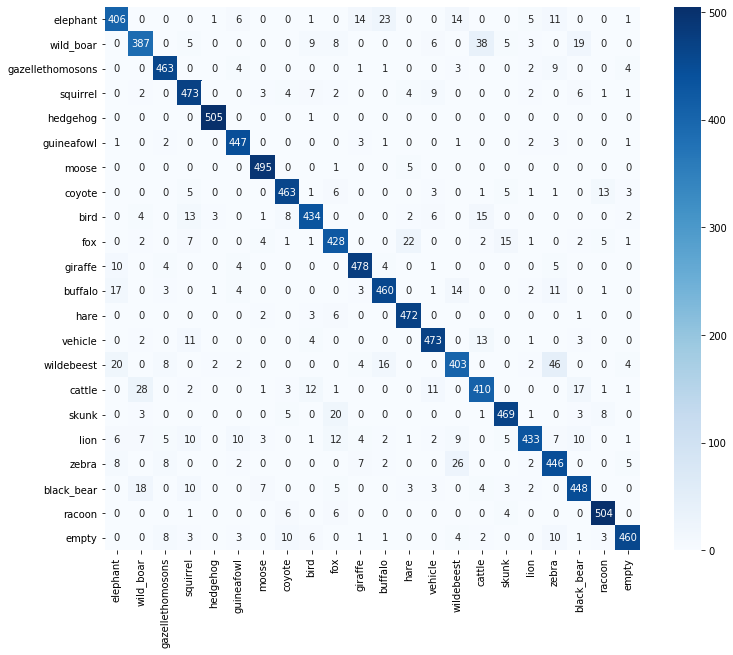

In [90]:
# C2=confusion_matrix(test_true_label,prediction_label, labels=labels)
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
C2=confusion_matrix(prediction_df['label'],prediction_df['label_pre'], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.figure(figsize=(12,10))
sns.heatmap(C2,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels,fmt='.20g')

### 8.Precision, recall, f1 score

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(prediction_df['label'],prediction_df['label_pre']))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       482
           1       0.85      0.81      0.83       480
           2       0.92      0.95      0.94       487
           3       0.88      0.92      0.90       514
           4       0.99      1.00      0.99       506
           5       0.93      0.97      0.95       461
           6       0.96      0.99      0.97       501
           7       0.93      0.92      0.92       502
           8       0.90      0.89      0.90       488
           9       0.86      0.87      0.87       491
          10       0.93      0.94      0.94       506
          11       0.90      0.89      0.90       517
          12       0.93      0.98      0.95       484
          13       0.92      0.93      0.93       507
          14       0.85      0.79      0.82       507
          15       0.84      0.84      0.84       487
          16       0.93      0.92      0.92       510
          17       0.94    